In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from thesis_v2 import dir_dict
from os.path import join

In [2]:
from thesis_v2.plots.ablation_study_new import do_all_readout_type

In [3]:
df_perf_ablation_7 = pd.read_pickle(
    join(dir_dict['analyses'], 'imagenet_8k', 'ablation_7', 'perf.pkl'),
)
df_perf_ablation_7['range_size'] = df_perf_ablation_7.index.get_level_values('multi_path_hack').map(lambda x: len(x.split(',')))
df_perf_ablation_7['range_start'] = df_perf_ablation_7.index.get_level_values('multi_path_hack').map(lambda x: int(x[3:].split(',')[0]))
df_perf_ablation_7 = df_perf_ablation_7.set_index(['range_size', 'range_start'], append=True)
df_perf_ablation_7 = df_perf_ablation_7.sort_index()

In [4]:
df_perf_ablation_7

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep range_size range_start                   
relu     False                mse       0          rmD1            2         16          7           cm-avg       5120       1          1                  0.651825   
                                                                                                     cm-last      5120       1          1                  0.631143   
                                                                                                     inst-avg     5120       1          1                  0.636907   
                                                                                                     inst-last    5120       1          1                  0.617851   
                                                                             32          7           cm-avg       5120       1          1                  0.662505   
...                                                                                                                                                             ...   
softplus True                 poisson   1          rmD7            2         16          7           inst-last    5120       1          7                  0.646671   
                                                                             32          7           cm-avg       5120       1          7                       NaN   
                                                                                                     cm-last      5120       1          7                       NaN   
                                                                                                     inst-avg     5120       1          7                       NaN   
                                                                                                     inst-last    5120       1          7                       NaN   

                                                                                                                                                     cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep range_size range_start                
relu     False                mse       0          rmD1            2         16          7           cm-avg       5120       1          1               0.300205   
                                                                                                     cm-last      5120       1          1               0.291732   
                                                                                                     inst-avg     5120       1          1               0.293937   
                                                                                                     inst-last    5120       1          1               0.286145   
                                                                             32          7           cm-avg       5120       1          1               0.305175   
...                                                                                                                                                          ...   
softplus True                 poisson   1          rmD7            2         16          7           inst-last    5120       1          7               0.297962   
                                                                             32          7           cm-avg       5120       1          7                    NaN   
                                                                                                     cm-last      5120       1          7                    NaN   
                                                                                                     inst-avg     5120       1          7                    NaN   
         

In [5]:
df_perf_ablation_7 = df_perf_ablation_7.droplevel(['train_keep', 'num_layer', 'rcnn_bl_cls', 'multi_path_hack'])

In [6]:
df_perf_ablation_7

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed out_channel readout_type range_size range_start                   
relu     False                mse       0          16          cm-avg       1          1                  0.651825   
                                                               cm-last      1          1                  0.631143   
                                                               inst-avg     1          1                  0.636907   
                                                               inst-last    1          1                  0.617851   
                                                   32          cm-avg       1          1                  0.662505   
...                                                                                                            ...   
softplus True                 poisson   1          16          inst-last    1          7                  0.646671   
                                                   32          cm-avg       1          7                       NaN   
                                                               cm-last      1          7                       NaN   
                                                               inst-avg     1          7                       NaN   
                                                               inst-last    1          7                       NaN   

                                                                                                    cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed out_channel readout_type range_size range_start                
relu     False                mse       0          16          cm-avg       1          1               0.300205   
                                                               cm-last      1          1               0.291732   
                                                               inst-avg     1          1               0.293937   
                                                               inst-last    1          1               0.286145   
                                                   32          cm-avg       1          1               0.305175   
...                                                                                                         ...   
softplus True                 poisson   1          16          inst-last    1          7               0.297962   
                                                   32          cm-avg       1          7                    NaN   
                                                               cm-last      1          7                    NaN   
                                                               inst-avg     1          7                    NaN   
                                                               inst-last    1          7                    NaN   

                                                                                                    cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed out_channel readout_type range_size range_start               
relu     False                mse       0          16          cm-avg       1          1              0.530682   
                                                               cm-last      1          1              0.522076   
                                                               inst-avg     1          1              0.525011   
                                                               inst-last    1          1              0.515028   
                                                   32          cm-avg       1          1              0.535824   
...                                                                                                        ...   
softplus True                 poisson   1          16          inst-last    1          7              0.528500   
                                           

In [7]:
df_perf_multipath = pd.read_pickle(
    join(dir_dict['analyses'], 'imagenet_8k', 'multipath', 'perf.pkl'),
)

In [8]:
df_perf_multipath_good = df_perf_multipath.xs(5120, level='train_keep').xs(7, level='rcnn_bl_cls').xs(2, level='num_layer')
df_perf_multipath_good = df_perf_multipath_good[df_perf_multipath_good.index.get_level_values('out_channel').isin({16,32})].sort_index()

In [9]:
df_perf_multipath_good

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed out_channel readout_type                   
relu     False                mse       0          16          cm-avg              0.643163   
                                                               cm-last             0.633916   
                                                               inst-avg            0.640895   
                                                               inst-last           0.623623   
                                                   32          cm-avg              0.674257   
...                                                                                     ...   
softplus True                 poisson   1          16          inst-last           0.637122   
                                                   32          cm-avg                   NaN   
                                                               cm-last                  NaN   
                                                               inst-avg                 NaN   
                                                               inst-last                NaN   

                                                                             cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed out_channel readout_type                
relu     False                mse       0          16          cm-avg           0.296850   
                                                               cm-last          0.292989   
                                                               inst-avg         0.295178   
                                                               inst-last        0.289027   
                                                   32          cm-avg           0.310076   
...                                                                                  ...   
softplus True                 poisson   1          16          inst-last        0.293669   
                                                   32          cm-avg                NaN   
                                                               cm-last               NaN   
                                                               inst-avg              NaN   
                                                               inst-last             NaN   

                                                                             cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed out_channel readout_type               
relu     False                mse       0          16          cm-avg          0.527683   
                                                               cm-last         0.523385   
                                                               inst-avg        0.526582   
                                                               inst-last       0.518915   
                                                   32          cm-avg          0.541079   
...                                                                                 ...   
softplus True                 poisson   1          16          inst-last       0.524015   
                                                   32          cm-avg               NaN   
                                                               cm-last              NaN   
                                                               inst-avg             NaN   
                                                               inst-last            NaN   

                                                                             num_param  
act_fn   ff_1st_bn_before_act loss_type model_seed out_channel readout_type             
relu     False                mse       0          16          cm-avg            25469  
                                                               cm-last           25469  
                                                               inst-avg          25469  
               

cm-avg


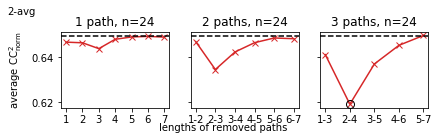

cm-last


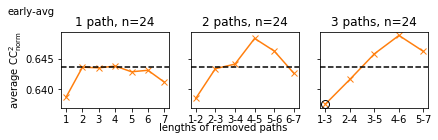

inst-avg


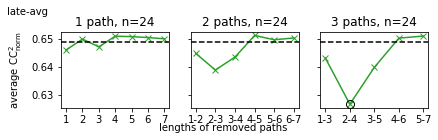

inst-last


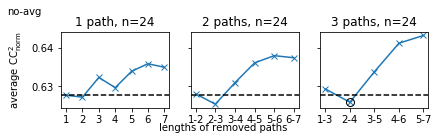

In [10]:
do_all_readout_type(
    df_original=df_perf_multipath_good,
    df_ablated=df_perf_ablation_7,
    plot_dir=join(dir_dict['plots'], 'imagenet_8k', 'ablation_7'),
)